In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, f1_score
import xgboost 
from mfs_split.mfs_split_alg import maximize_distance_evolutionary

In [5]:
def analytical_max_split(X):
    sorted_x = sorted(X)
    X1, X2 = train_test_split(sorted_x, test_size=0.4, shuffle=False)
    x1_max = np.array(np.max(X1))
    x2_max = np.array(np.max(X2))
    return np.linalg.norm(x1_max - x2_max)

In [6]:
def analytical_mean_split(X):
    sorted_x = sorted(X)
    X1, X2 = train_test_split(sorted_x, test_size=0.4, shuffle=False)
    x1_mean = np.array(np.mean(X1))
    x2_mean = np.array(np.mean(X2))
    return np.linalg.norm(x1_mean - x2_mean)

In [2]:
data = pd.read_csv('data/electricity_source.csv', index_col=[0])
data[list(data.columns)[-1]] = data[list(data.columns)[-1]].astype(int)
data.reset_index(inplace=True, drop=True)
X, y = data[list(data.columns)[:-1]].values, data[list(data.columns)[-1]].values
data_target = pd.read_csv('data/electricity_target.csv', index_col=[0])
data_target[list(data_target.columns)[-1]] = data_target[list(data_target.columns)[-1]].astype(int)
data_target.reset_index(inplace=True, drop=True)
X_ood, y_ood = data_target[list(data_target.columns)[:-1]].values, data_target[list(data_target.columns)[-1]].values

In [9]:
f1 = []
model = xgboost.XGBClassifier()
for _ in range(10):
    X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.4)
    clf = model.fit(X_train, y_train)
    f1.append(f1_score(y_hold, clf.predict(X_hold)))
np.mean(f1)

0.7019265482191934

In [3]:
train_ind, test_int, fitness = maximize_distance_evolutionary(X, y, test_size=0.4, n_generations=400)

0.045205255840773506
0.05730618204430288
0.05730618204430288
0.05730618204430288
0.06467460255562058
0.07661041351197848
0.07702195676472766
0.08242314130686332
0.09989150133865993
0.09989150133865993
0.09989150133865993
0.1164074972469314
0.1164074972469314
0.11684334294650699
0.1221665046255149
0.12462219315837796
0.1270258139734814
0.13074067392763716
0.13695873202412295
0.13824207744144779
0.15087623011093138
0.15153766254347886
0.15976100536473636
0.15976100536473636
0.15976100536473636
0.16065529044248186
0.16320506140483412
0.1649605937564811
0.16896884871158255
0.17205113589870621
0.17205113589870621
0.17607974342795132
0.1784138695257584
0.1822599164891462
0.1856678616289851
0.1864639770061857
0.19122510209225735
0.19747489240390143
0.19747489240390143
0.19747489240390143
0.20304817212054327
0.204521141139769
0.20492572082977806
0.20711627363901566
0.20711627363901566
0.2113223788005786
0.21136666770136006
0.2134585557516229
0.2134585557516229
0.2168120851460045
0.224051988610

In [ ]:
order_fitness = [0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19849118069338442,
 0.19864874631346408,
 0.2004298887897106,
 0.2017648757636163,
 0.20732248526089933,
 0.20997726290224314,
 0.2104085507304305,
 0.21588004128940746,
 0.21588004128940746,
 0.2160633469034809,
 0.21971859470006627,
 0.21971859470006627,
 0.21971859470006627,
 0.22735881427038043,
 0.23080283097788676,
 0.23916457772794514,
 0.23916457772794514,
 0.23916457772794514,
 0.2409603000649544,
 0.2409603000649544,
 0.24268599000334076,
 0.24650294684285043,
 0.2483157590892038,
 0.24992132394279865,
 0.25465291204186746,
 0.2576686272932385,
 0.2576686272932385,
 0.2576686272932385,
 0.2584549565364489,
 0.25909562088756527,
 0.2677890826488101,
 0.2677890826488101,
 0.2677890826488101,
 0.2724344364107762,
 0.2724344364107762,
 0.2724344364107762,
 0.2749552970959445,
 0.2749552970959445,
 0.2749552970959445,
 0.2749552970959445,
 0.280568819124844,
 0.280568819124844,
 0.280568819124844,
 0.28079246701994076,
 0.28079246701994076,
 0.28079246701994076,
 0.28079246701994076,
 0.28079246701994076,
 0.28079246701994076,
 0.28079246701994076,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.29080519679853384,
 0.2909518346146487,
 0.29282158082746784,
 0.29282158082746784,
 0.29282158082746784,
 0.29282158082746784,
 0.2951061848420059,
 0.2951061848420059,
 0.29786905306942824,
 0.29786905306942824,
 0.29786905306942824,
 0.29786905306942824,
 0.29786905306942824,
 0.29786905306942824,
 0.2988408352533006,
 0.29950586523184364,
 0.29950586523184364,
 0.29950586523184364,
 0.3004878962990822,
 0.3004878962990822,
 0.3004878962990822,
 0.3004878962990822,
 0.3004878962990822,
 0.3004878962990822,
 0.3034307241869286,
 0.3034307241869286,
 0.3034307241869286,
 0.3034307241869286,
 0.3034307241869286,
 0.3035966409858251,
 0.30402856149792457,
 0.30402856149792457,
 0.30402856149792457,
 0.30402856149792457,
 0.30537776043804943,
 0.30537776043804943,
 0.30537776043804943,
 0.30537776043804943,
 0.3068606005800881,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30889378114011795,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.30936973827008785,
 0.3096561889437521,
 0.3096561889437521,
 0.3096561889437521,
 0.3096561889437521,
 0.31249426489785465,
 0.31249426489785465,
 0.31249426489785465,
 0.3125800056904358,
 0.3125800056904358,
 0.3125800056904358,
 0.3170789651634532,
 0.3170789651634532,
 0.3170789651634532,
 0.3170789651634532,
 0.3170789651634532,
 0.3170789651634532,
 0.3174004518567722,
 0.3174004518567722,
 0.3174004518567722,
 0.3174004518567722,
 0.3174004518567722,
 0.3174004518567722,
 0.3174004518567722,
 0.31851476028870407,
 0.31851476028870407,
 0.32003958363749274,
 0.32003958363749274,
 0.3208038968189962,
 0.3208038968189962,
 0.3208038968189962,
 0.32255146208589863,
 0.32255146208589863,
 0.3236185362962134,
 0.32374037245432036,
 0.32374037245432036,
 0.32374037245432036,
 0.32374037245432036,
 0.32374037245432036,
 0.32374037245432036,
 0.32374037245432036,
 0.324256886913182,
 0.324256886913182,
 0.324256886913182,
 0.324256886913182,
 0.324256886913182,
 0.324256886913182,
 0.324256886913182,
 0.32582007203558194,
 0.3263951043211906,
 0.32916468172345514,
 0.32916468172345514,
 0.32916468172345514,
 0.32916468172345514,
 0.32916468172345514,
 0.3313529583871344,
 0.3313529583871344,
 0.3313529583871344,
 0.33561660400498117,
 0.33561660400498117,
 0.33561660400498117,
 0.33561660400498117,
 0.33561660400498117,
 0.33561660400498117,
 0.33561660400498117,
 0.33561660400498117,
 0.3365787183526238,
 0.3376471918953618,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.3411352869983325,
 0.34125154826250886,
 0.34242267715884356,
 0.34242267715884356,
 0.34242267715884356,
 0.3455965361669615,
 0.3455965361669615,
 0.3455965361669615,
 0.3455965361669615,
 0.3455965361669615,
 0.3483368335908997,
 0.3483368335908997,
 0.3483368335908997,
 0.3483368335908997,
 0.3483368335908997,
 0.3486234600291827,
 0.3528140196587932,
 0.3528140196587932,
 0.3528140196587932,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3552567846562811,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3577809566809092,
 0.3578062227816738,
 0.3578062227816738,
 0.3578062227816738,
 0.3578062227816738,
 0.3611407925290255,
 0.3611407925290255,
 0.36501655236343084,
 0.36501655236343084,
 0.3652735508399936,
 0.3652735508399936,
 0.3652735508399936,
 0.3658881792749665,
 0.3658881792749665,
 0.3658881792749665,
 0.3658881792749665,
 0.3658881792749665,
 0.3658881792749665,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3670020047411597,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542,
 0.3705876347807542]

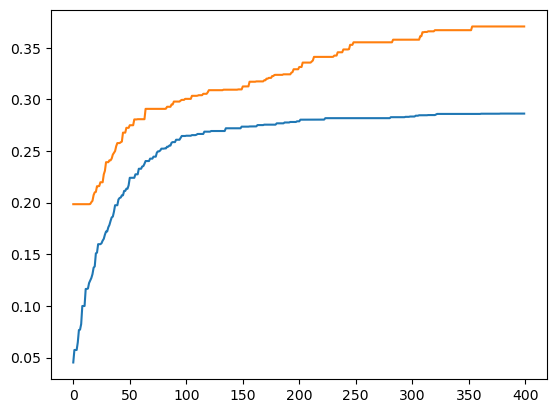

In [ ]:
import matplotlib.pyplot as plt



plt.plot(np.arange(0, len(fitness)), fitness)
plt.plot(np.arange(0, len(order_fitness)), order_fitness)

In [ ]:
X_train, y_train = X[train_ind], y[train_ind]
X_test, y_test = X[test_int], y[test_int]

In [ ]:
model.fit(X_train, y_train)
f1_score(y_test, model.predict(X_test))

0.8332926531608494